In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

image =Image.open('/content/ml pic.jpeg').convert('L')
image =image.resize((256, 256))
img_data =np.array(image)
M =img_data.reshape(-1, 256)

In [28]:
def perform_pca_and_reconstruct(X,n_components):
    pca =PCA(n_components=n_components)
    M_reduced = pca.fit_transform(X)
    M_reconstructed = pca.inverse_transform(M_reduced)
    return M_reconstructed.reshape(256, 256)

In [29]:
components =[5,20,50,100]

reconstruct_imgs ={}
for n in components:
    reconstruct_imgs[n] =perform_pca_and_reconstruct(X, n)

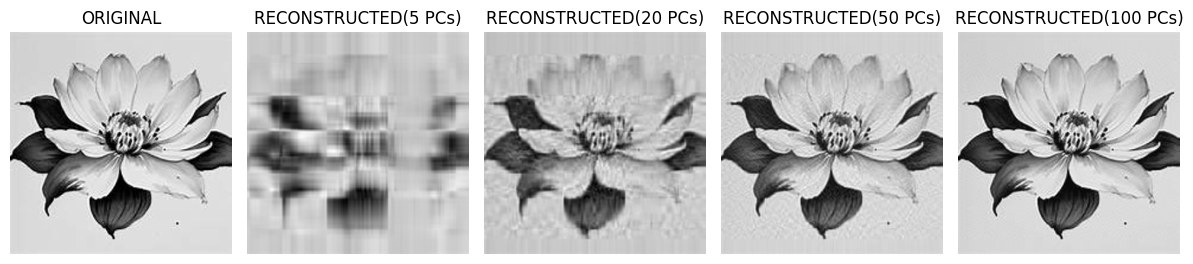

In [30]:
def plot_images(original,reconstruct_imgs):
    plt.figure(figsize=(12,8))

    plt.subplot(1,len(reconstruct_imgs)+ 1,1)
    plt.title('ORIGINAL')
    plt.imshow(original,cmap='gray')
    plt.axis('off')

    for i,(n,img) in enumerate(reconstruct_imgs.items()):
        plt.subplot(1,len(reconstruct_imgs)+1,i+2)
        plt.title(f'RECONSTRUCTED({n} PCs)')
        plt.imshow(img,cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_images(img_data,reconstruct_imgs)
